## ВВЕДЕНИЕ

Matplotlib — отличная библиотека 2D- и 3D-графики для создания научных графиков Преимущества этой библиотеки:

* легкий старт
* Поддержка системы разметки документов LaTeX
* Возможность редактирования каждого элемента графика, включая размеры графика и DPI (количество пикселей на дюйм)
* Высококачественный экспорт в другие форматы, включая  PNG, PDF, SVG, EPS, and PGF.
* GUI (Графический пользовательский интерфейс)  для интерактивного изучения графиков и поддержка автономной генерации файлов фигур (полезно для пакетных заданий)

Одна из ключевых особенностей matplotlib, которую я хотел бы подчеркнуть и которая, я думаю, делает matplotlib очень подходящим для создания рисунков и графиков для научных публикаций, заключается в том, что всеми аспектами рисунка можно управлять *программно*. Это важно для воспроизводимости и удобно, когда нужно восстановить фигуру с обновленными данными или изменить ее внешний вид.

Больше информации о библиотеке о Matplotlib на сайте: http://matplotlib.org/

Для использования Matplotlib в Python , надо подключить модуль `pylab`  (наиболее легкий путь):

In [3]:
from pylab import *

или импортировать `matplotlib.pyplot` модуль под именем `plt` (короткий путь):

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
import numpy as np

## MATLAB-подобный API

Самый простой способ начать работать с помощью matplotlib — это использование API-интерфейса, похожего на MATLAB, предоставляемый matplotlib. Он предназначен для совместимости с функциями построения графиков в MATLAB, поэтому с ним легко начать работу, если вы знакомы с MATLAB. Чтобы использовать этот API из matplotlib, нам нужно модули pylab:



In [6]:
from pylab import *

### Примеры

Простой пример использования API - интерфейса как в построении графиков в MATLAB:

In [7]:
# Генерируем линейную сетку (координата X)
x = np.linspace(0, 5, 10)
# получение значений второй координаты точки для графика
y = x**2

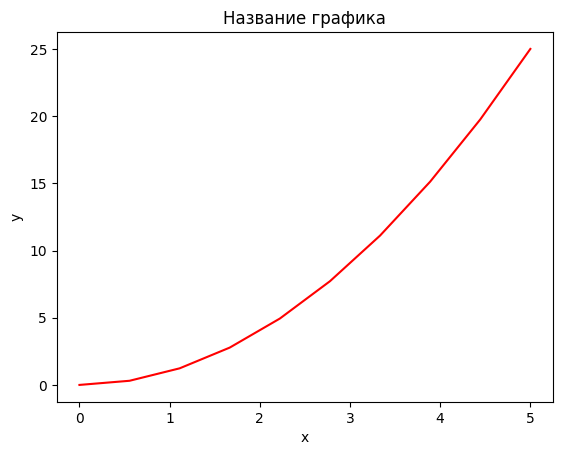

In [8]:
# создание нового графика
figure()
# построение двумерного графика с координатами x и y, третий параметр 'r' отвечает за цвет графика, в данном случае красный от англ. red
plot(x, y, 'r')
# название оси X
xlabel('x')
# название оси Y
ylabel('y')
title('Название графика')
# функция показа построенного графика
show()

Большинство функций MATLAB, связанных с построением графиков, покрываются модулем `pylab`. Например,  подграфикии выбор цвета/символа:
Most of the plotting related functions in MATLAB are covered by the `pylab` module. For example, subplot and color/symbol selection:

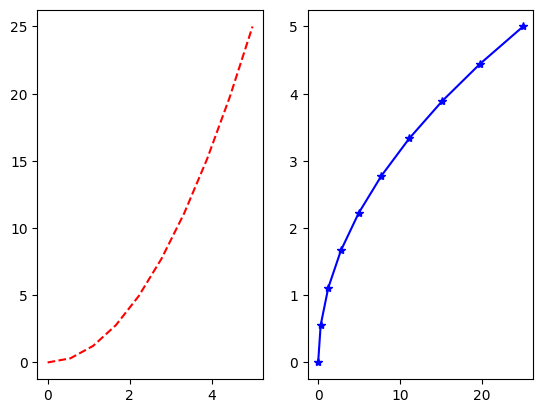

In [9]:
# subplot(m,n,p) делит текущую фигуру на m на n таблицу (m строк, n столбцов) и создает оси в положении,
# указанном параметром p
subplot(1,2,1)
# построение двумерного графика с координатами x и y, третий параметр 'r' отвечает за цвет графика, в данном случае красный от англ. red и
# и '--' показывает, что такой линией будет отображаться график
plot(x, y, 'r--')
# Объясните, что обозначает код двух нижних строчек
subplot(1,2,2)
plot(y, x, 'b*-');

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

Преимущество API-интерфейса pylab в стиле MATLAB заключается в том, что с ним легко начать работу, если вы знакомы с MATLAB, и он требует минимальных затрат времени на построение простых графиков.

Однако мы бы рекомендовали использовать API, совместимый с MATLAB, только для самых простых графиков.

Вместо этого мы рекомендуем изучить и использовать объектно-ориентированный интерфейс для построения графиков matplotlib.

## Matplotlib: объектно-ориентированный интерфейс

Основная идея использования более формального объектно-ориентированного метода состоит в том, чтобы создавать объекты фигур, а затем просто вызывать методы или атрибуты этого объекта. Этот подход помогает лучше справляться с холстом, на котором есть несколько графиков.


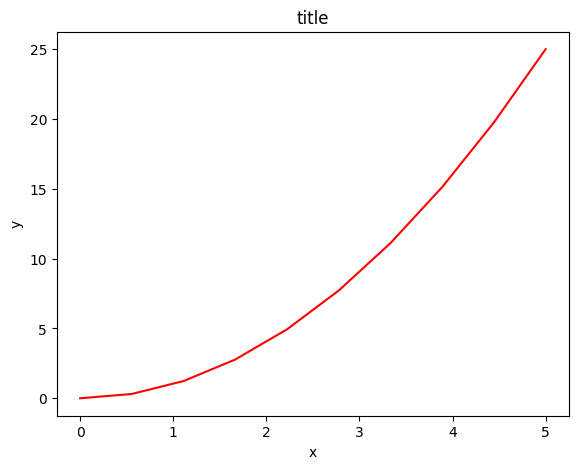

In [11]:
# сначала создаем пустой холст, на котором будем строить график
fig = plt.figure()
# добавление осей к холсту
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # слева, снизу, ширина , высота (range 0 to 1)
# построение двумерного графика с координатами x и y, третий параметр 'r' отвечает за цвет графика, в данном случае красный от англ. red
axes.plot(x, y, 'r')
# название оси X
axes.set_xlabel('x')
# название оси Y
axes.set_ylabel('y')
# название графика
axes.set_title('title');

Мы видим, что требуется немного больше кода, но преимущество состоит в том, что теперь у нас есть полный контроль над расположением осей графика, и мы можем легко добавить на холст к графику еще один:

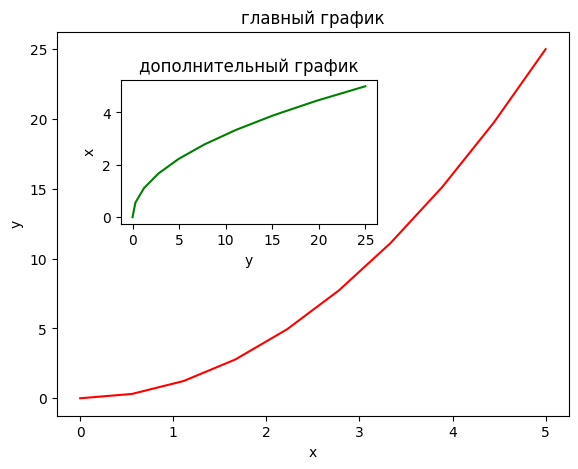

In [12]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # добавление главных осей
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # вставка дополнительных осей

# рисование главного графика
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('главный график')

# рисование дополнительного графика
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('дополнительный график');

Если мы не заботимся о том, чтобы явно указать, где наши оси графика размещены на холсте рисунка, мы можем использовать один из многих менеджеров компоновки осей в matplotlib. Будем использовать `subplots`, вот так:

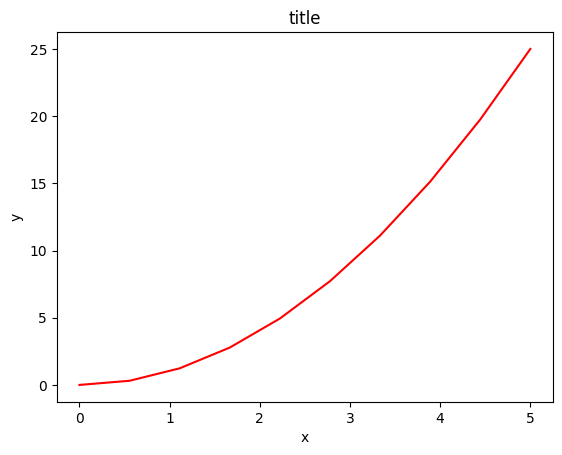

In [13]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

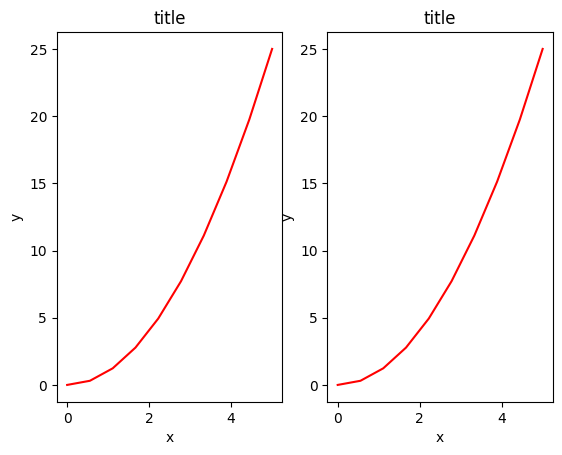

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)# создали сетку объектов на холсте, т.е одна строка и 2 столбца, т.е. два одинаковых графика радом в одной строке

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

Это было легко, но не так красиво с перекрывающимися осями фигур и метками, верно?

Мы можем справиться с этим, используя метод fig.tight_layout, который автоматически регулирует положение осей на холсте фигуры, чтобы графики не перекрывали друг друга.


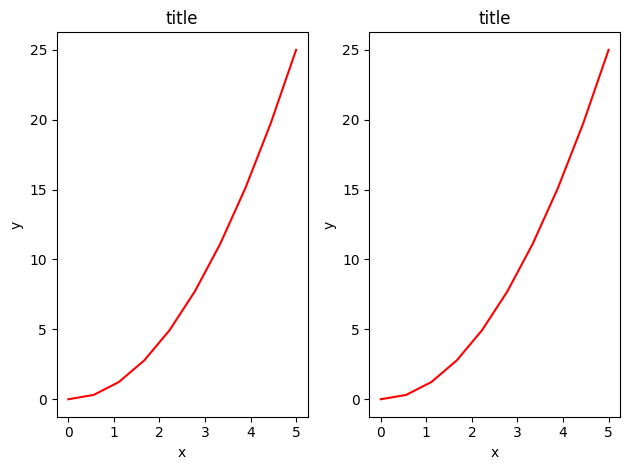

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig.tight_layout()

### Размер рисунка, соотношение сторон и DPI

Matplotlib позволяет указывать соотношение сторон, DPI и размер фигуры при создании объекта Figure с использованием аргументов ключевого слова figsize и dpi. figsize — это кортеж ширины и высоты фигуры в дюймах, а dpi — количество точек на дюйм (пикселей на дюйм). Чтобы создать фигуру размером 800x400 пикселей с разрешением 100 точек на дюйм, мы можем сделать следующее:

In [16]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Те же аргументы мы можем передать и менеджеру компоновки, таким как функция subplots:

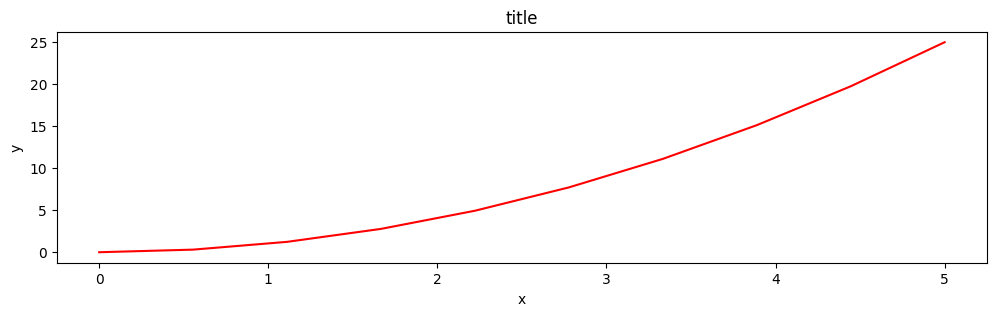

In [17]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Сохранение графика как графического файла

Чтобы сохранить фигуру в файл, мы можем использовать метод savefig в классе Figure:

In [18]:
fig.savefig("filename.png")

Здесь мы также можем дополнительно указать DPI и выбрать между различными итоговыми графическими форматами:

In [19]:
fig.savefig("filename.png", dpi=200)

#### Какие форматы доступны и какие из них следует использовать для наилучшего качества?

Matplotlib может генерировать высококачественный вывод в различных форматах, включая PNG, JPG, EPS, SVG, PGF и PDF. Для научных статей я рекомендую по возможности использовать PDF. (Документы LaTeX, скомпилированные с помощью pdflatex, могут включать PDF-файлы с помощью команды includegraphics). В некоторых случаях PGF также может быть хорошей альтернативой.




### Легенды, подписи и названия при построении графиков


**Заголовок рисунков**

Заголовок можно добавить к каждому графику на рисунке. Чтобы установить заголовок, используйте метод set_title в экземпляре оси:


In [20]:
ax.set_title("title");

**Подписи осей**

Точно так же с помощью методов `set_xlabel` и `set_ylabel` мы можем установить подписи осей X и Y:





In [21]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Легенды**

Легенды для кривых на графике можно добавить двумя способами. Один из способов заключается в использовании метода `legend` и передаче  текста легенды для ранее определенных кривых:



In [22]:
ax.legend(["curve1", "curve2", "curve3"]);

Описанный выше метод следует  из MATLAB. Он в некоторой степени подвержен ошибкам и негибок, особенно, если кривые добавляются или удаляются из рисунка (что приводит к неправильной маркировке кривой).

Лучшим методом является использование аргумента ключевого слова label="label text" при добавлении к рисунку графиков или других объектов, а затем используем метод `legend` без аргументов для добавления легенды к рисунку:





In [23]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

Преимущество этого метода заключается в том, что при добавлении или удалении кривых с рисунка легенда автоматически обновляется соответствующим образом.

Функция легенды может использовать необязательный аргумент ключевого слова loc, который можно использовать для указания того, где на рисунке должна быть нарисована легенда. Допустимые значения loc — это числовые коды различных мест, где может быть отображена легенда. Подробнее см. http://matplotlib.org/users/legend_guide.html#legend-location. Некоторые из наиболее распространенных значений loc:




In [24]:
ax.legend(loc=0) # позволить библиотеке matplotlib самой решить какое расположение легенды будет оптимальным
ax.legend(loc=1) # верхний правый угол
ax.legend(loc=2) # верхний левый угол
ax.legend(loc=3) # нижний левый угол
ax.legend(loc=4) # нижний правый угол
# .. many more options are available

На следующем рисунке показано, как использовать заголовок рисунка, метки осей и легенду, описанные выше:

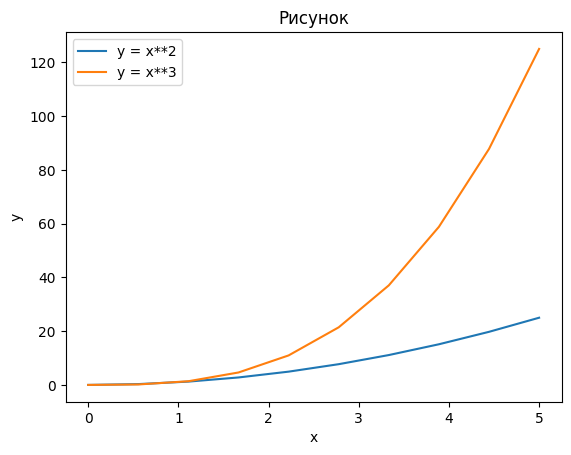

In [25]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # верхний левый угол
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Рисунок');

### Форматирование текста: LaTeX, размер шрифта, семейство шрифтов

Matplotlib отлично поддерживает LaTeX. Все, что нам нужно сделать, это использовать знаки доллара, инкапсулирующие LaTeX в любом тексте (легенде, заголовке, метке и т. д.). Например, "$y=x^3$".

Но здесь мы можем столкнуться с небольшой проблемой с кодом LaTeX и текстовыми строками Python. В LaTeX мы часто используем обратную косую черту в командах, например, \alpha для создания символа α. Но обратная косая черта уже имеет значение в строках Python (символ escape-кода). Чтобы Python не испортил наш латексный код, нам нужно использовать «сырые» текстовые строки. Необработанные текстовые строки начинаются с 'r', например r"\alpha" или r'\alpha' вместо "\alpha" или '\alpha':

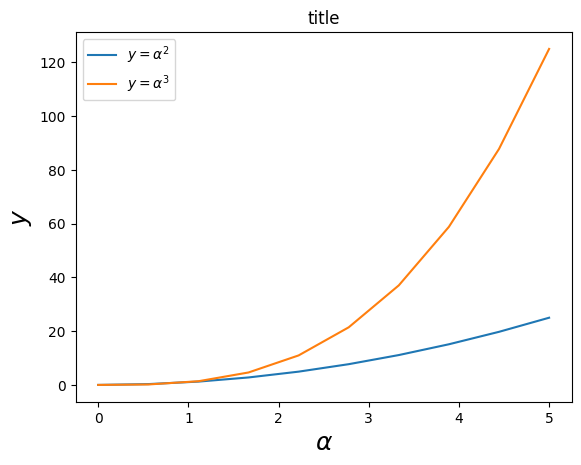

In [26]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # верхний левый угол
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

Мы также можем изменить глобальный размер шрифта и семейство шрифтов, которые применяются ко всем текстовым элементам на рисунке (метки делений, метки и заголовки осей, легенды и т. д.):

In [27]:
# Изменение глобальных параметров для matplotlib :
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'serif'})

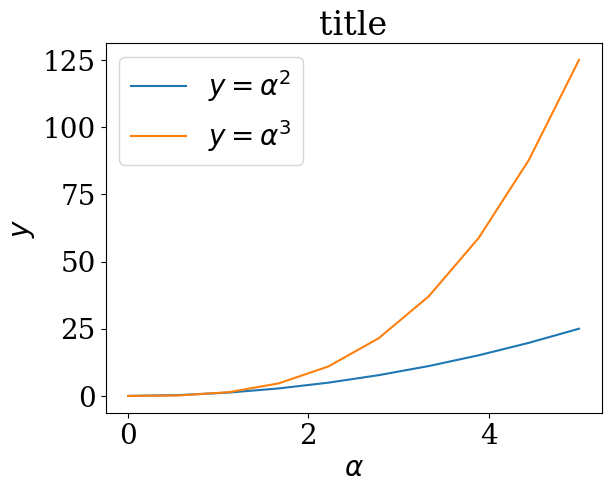

In [28]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # верхний левый угол
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

Хорошим выбором глобальных шрифтов являются шрифты семейства STIX:

In [29]:
# Изменение глобальных параметров для matplotlib :
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

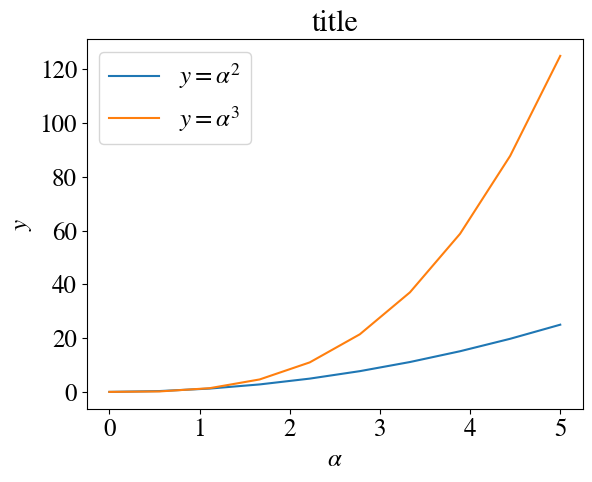

In [30]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # верхний левый угол
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [31]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Изменение цветов, ширины и типов линий в графиках

Цвета

С помощью matplotlib мы можем определять цвета линий и других графических элементов несколькими способами. Прежде всего, мы можем использовать синтаксис, подобный MATLAB, где «b» означает синий, «g» означает зеленый и т. д. Также поддерживается API MATLAB для выбора стилей линий: где, например, «b.-» означает синяя линия с точками:

In [32]:
# синтаксис MATLAB для определения цвета и типа линии
ax.plot(x, x**2, 'b.-') # голубая линия с точками
ax.plot(x, x**3, 'g--') # зеленая пунктирная линия

Мы также можем определить цвета по их именам или шестнадцатеричным кодам RGB и, при необходимости, указать альфа-значение, используя аргументы ключевого слова color и alpha:


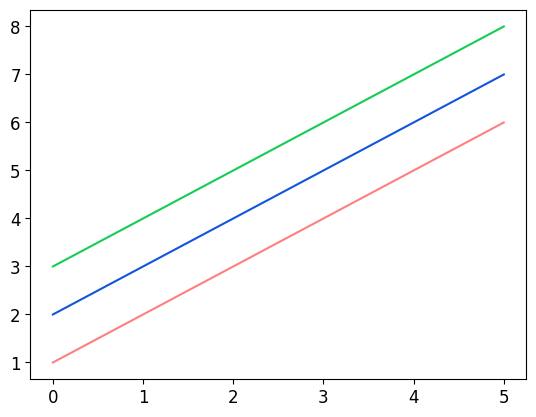

In [33]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # прозрачнокрасный
ax.plot(x, x+2, color="#1155dd")        #  Шестнадцатеричный код RGB для голубоватого цвета
ax.plot(x, x+3, color="#15cc55")        #  Шестнадцатеричный код RGB для зеленоватого цвета

#### Стили линий и маркеров

Чтобы изменить ширину линии, мы можем использовать аргумент ключевого слова linewidth или lw. Стиль линии можно выбрать с помощью аргументов ключевого слова linestyle или ls:

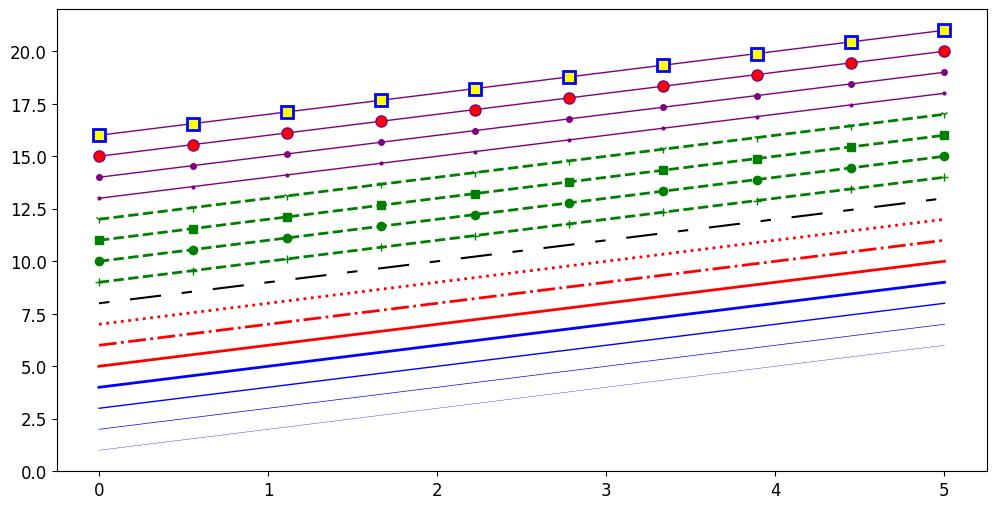

In [34]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# возможные варианты типов линий ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# пунктир от руки
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # формат: длина строки, длина пробела, ...

# возможные символы маркера: маркер = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# маркер размера и цыета
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8,
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Управление внешним видом оси

Внешний вид осей — важный аспект рисунка, который нам часто приходится модифицировать, чтобы сделать публикацию качественной графикой. Нам нужно иметь возможность контролировать, где размещаются галочки и метки, изменять размер шрифта и, возможно, метки, используемые на осях. В этом разделе мы рассмотрим управление этими свойствами на рисунке matplotlib.

#### Диапазон графика

Первое, что мы можем захотеть настроить, это диапазоны осей. Мы можем сделать это, используя методы set_ylim и set_xlim в объекте оси или axis('tight') для автоматического получения «плотно подогнанных» диапазонов осей:

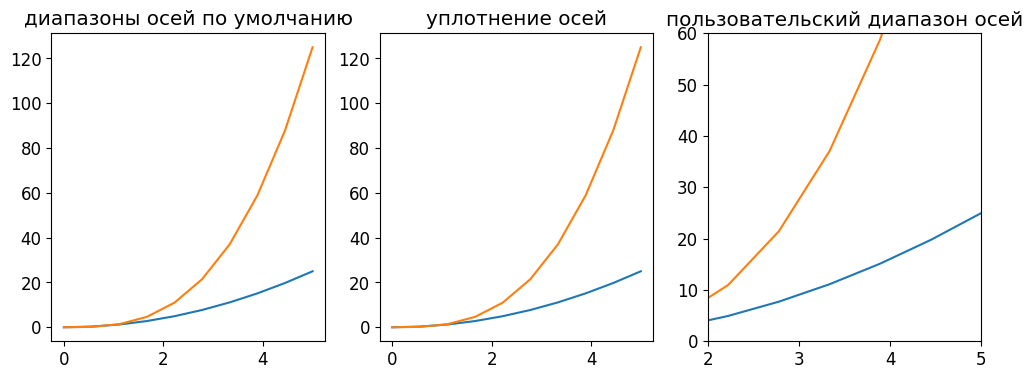

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("диапазоны осей по умолчанию")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("уплотнение осей")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("пользовательский диапазон осей");

#### Логарифмическая шкала

Также можно установить логарифмическую шкалу для одной или обеих осей. Эта функциональность на самом деле является лишь одним из приложений более общей системы преобразования в Matplotlib. Каждая из шкал осей устанавливается отдельно с помощью методов set_xscale и set_yscale, которые принимают один параметр (в данном случае со значением «log»):

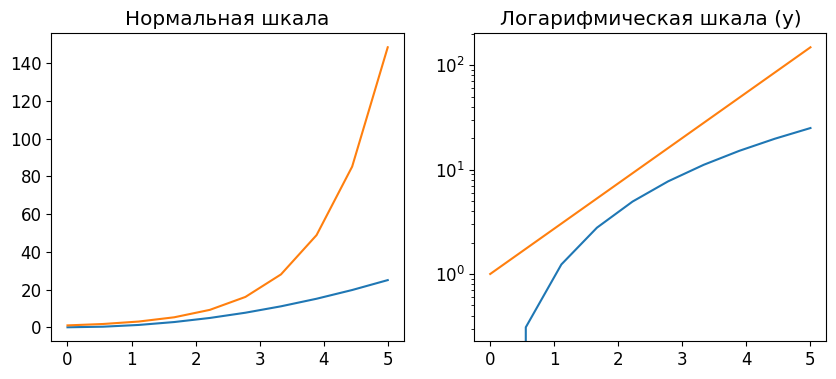

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Нормальная шкала")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Логарифмическая шкала (y)");

### Размещение галочек и настраиваемых меток галочек

Мы можем явно определить, где мы хотим отмечать оси, с помощью set_xticks и set_yticks, которые принимают список значений того, где на оси должны быть размещены отметки. Мы также можем использовать методы set_xticklabels и set_yticklabels, чтобы предоставить список пользовательских текстовых меток для каждого положения галочки:

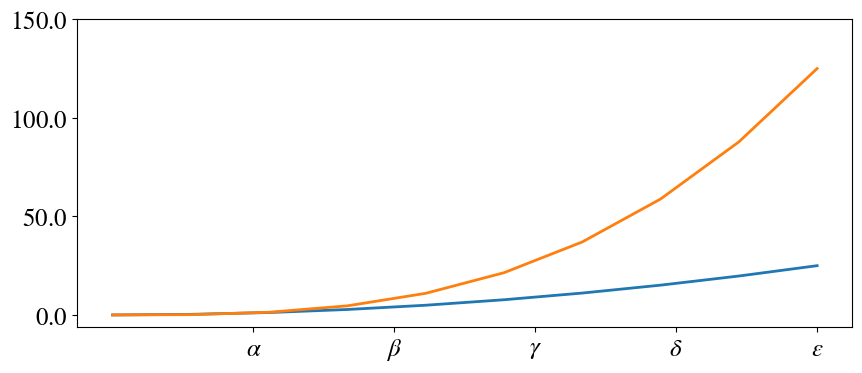

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # использование формата LaTeX

Существует ряд более продвинутых методов управления размещением основных и второстепенных делений в рисунках matplotlib, таких как автоматическое размещение в соответствии с различными политиками. Подробнее см. http://matplotlib.org/api/ticker_api.html.

#### Научная нотация

При больших числах на осях часто лучше использовать экспоненциальное представление:

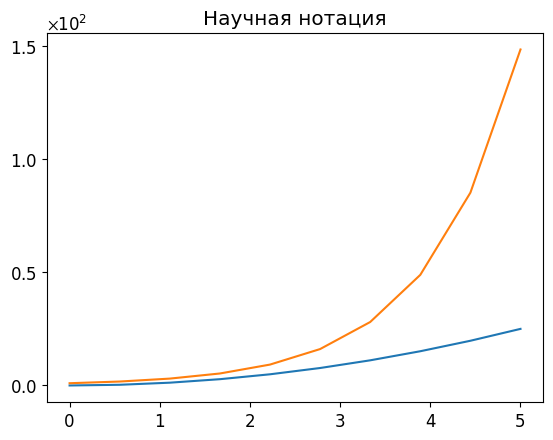

In [38]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Научная нотация")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,2))
ax.yaxis.set_major_formatter(formatter)

### Номер оси и расстояние между метками оси

> Блок с отступами



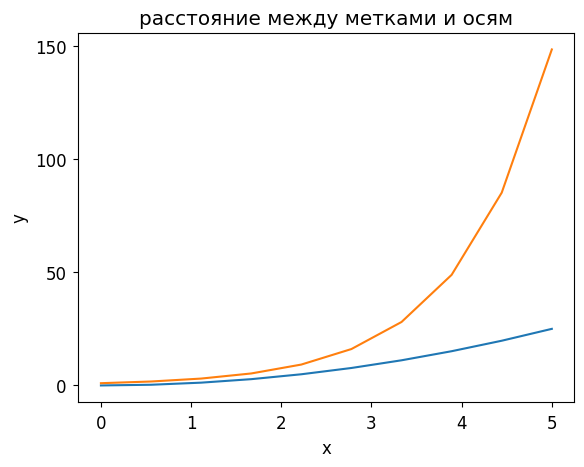

In [39]:
# расстояние между осями x и y и числа на осях
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("расстояние между метками и осям")

# отступ между меткой оси и номером ос
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [40]:
# восстановить настройки по-умолчанию
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Регулировка положения оси

К сожалению, при сохранении фигур иногда обрезаются метки, и может потребоваться немного подкорректировать положение осей. Это можно сделать с помощью subplots_adjust:

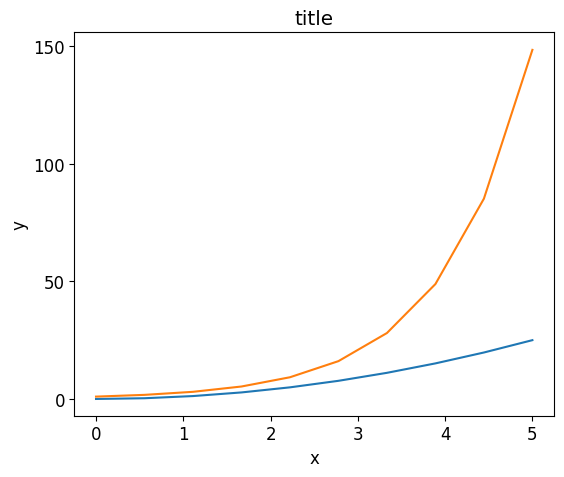

In [41]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Осевая сетка

С помощью метода сетки в объекте оси мы можем включать и выключать линии сетки. Мы также можем настроить внешний вид линий сетки, используя те же аргументы ключевого слова, что и функция plot:

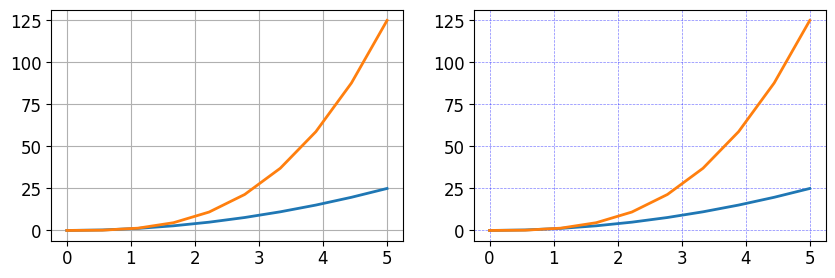

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# внешний вид сетки по умолчанию
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# внешний вид пользовательской сетки
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Цвет осей

Мы также можем изменить свойства  осей.

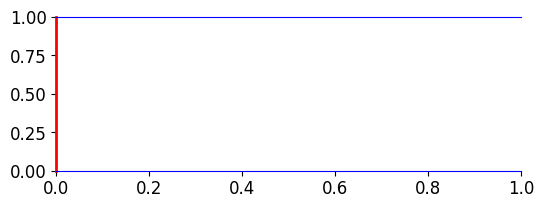

In [43]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# повернуть ось  вправо
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # галочки только с левой стороны

### Двойные оси

Иногда полезно иметь на фигуре двойные оси x или y; например, при совместном построении кривых с разными единицами измерения. Matplotlib поддерживает это с помощью функций twinx и twiny:

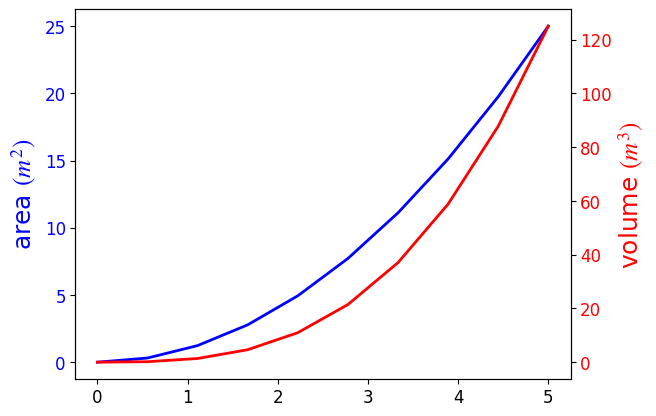

In [44]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Оси с началом координат по центру

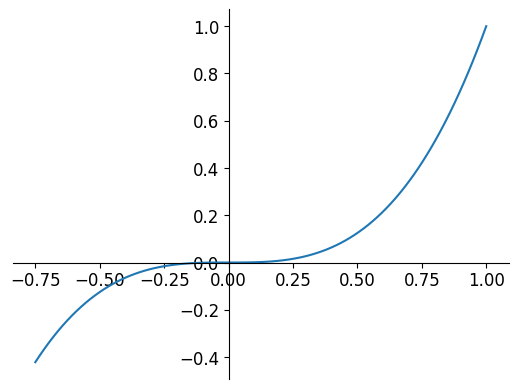

In [45]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # установить положение оси х с х=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # установить положение оси у с у=0
xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Другие стили 2D-графики

В дополнение к обычному методу построения графиков существует ряд других функций для создания различных типов графиков. Полный список доступных типов графиков см. в галерее графиков matplotlib: http://matplotlib.org/gallery.html. Некоторые из наиболее полезных из них показаны ниже:

In [46]:
n = np.array([0,1,2,3,4,5])

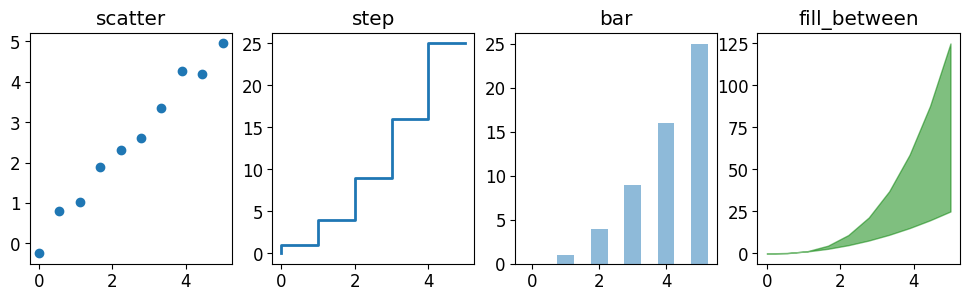

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(x, x + 0.25*np.random.randn(len(x)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

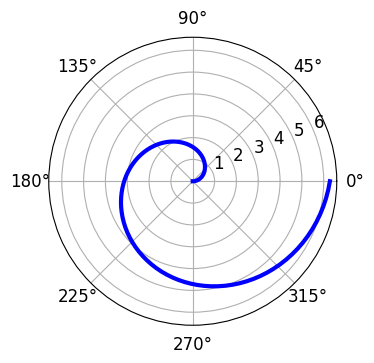

In [48]:
# использование полярных координат
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

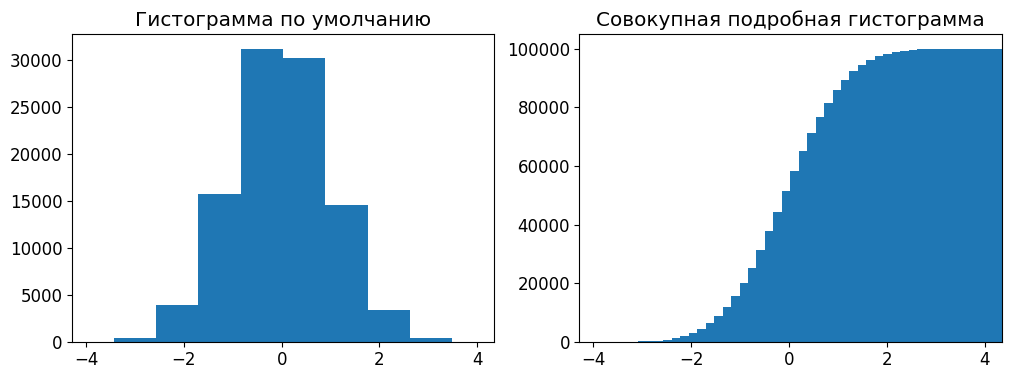

In [49]:
# Гистограммы
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Гистограмма по умолчанию")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Совокупная подробная гистограмма")
axes[1].set_xlim((min(n), max(n)));

### Подписи к графикам

Аннотировать текст в рисунках matplotlib можно с помощью функции text. Он поддерживает форматирование LaTeX так же, как тексты и заголовки меток осей:

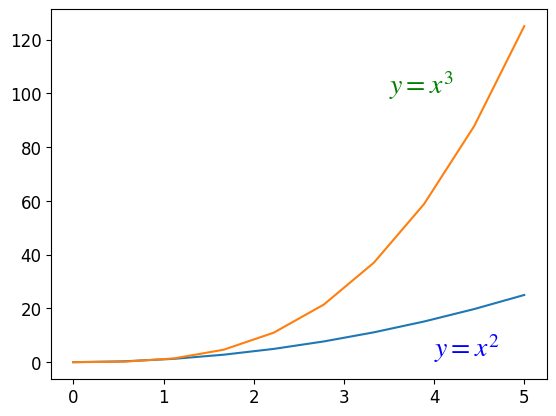

In [50]:
fig, ax = plt.subplots()

ax.plot(x, x**2, x, x**3)

ax.text(4, 2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(3.5, 100, r"$y=x^3$", fontsize=20, color="green");

### Графики с несколькими сюжетами и вставками

Оси можно добавить на холст рисунка matplotlib вручную с помощью fig.add_axes или с помощью менеджера компоновки подрисунков, такого как subplots, subplot2grid или gridspec:

#### Расположение графиков в таблице из двух строк и трех столбцов

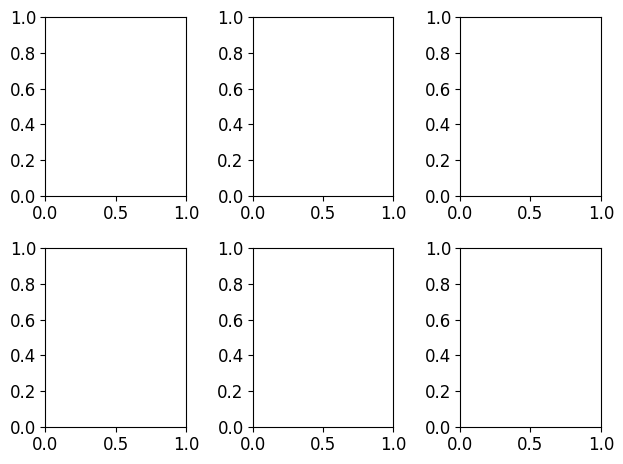

In [51]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### расположение графиков, позволяющее занимать графику несколько ячеек таблицы

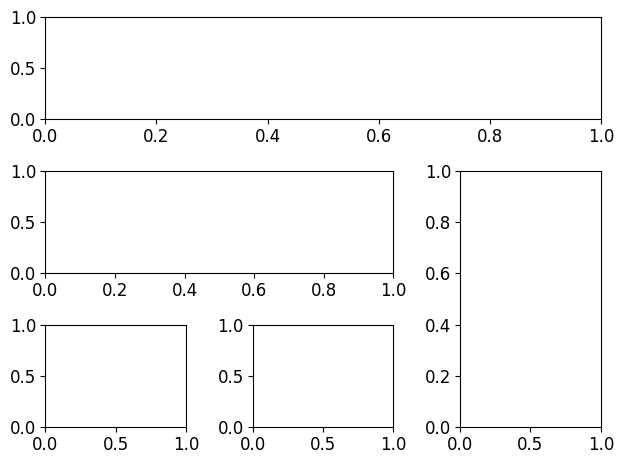

In [52]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec - создает окно, которое разбивается на виртуальную таблицу размером n x m. Затем создаются графики, которые могут занимать не одну ячейку таблицы, а сразу несколько ячеек

In [53]:
import matplotlib.gridspec as gridspec

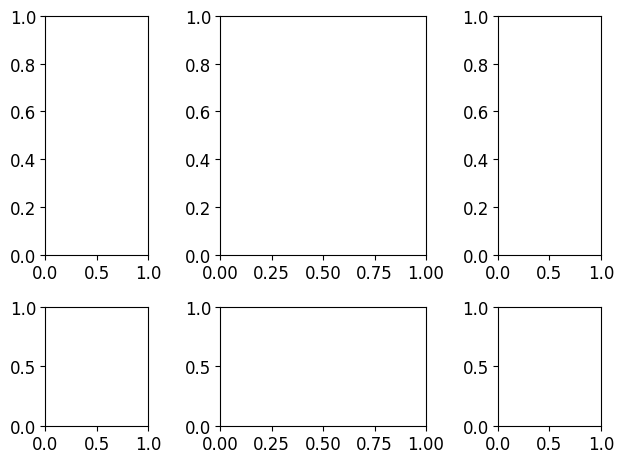

In [54]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)

fig.tight_layout()

#### add_axes

Добавление осей вручную с помощью add_axes полезно для добавления вставок к фигурам:

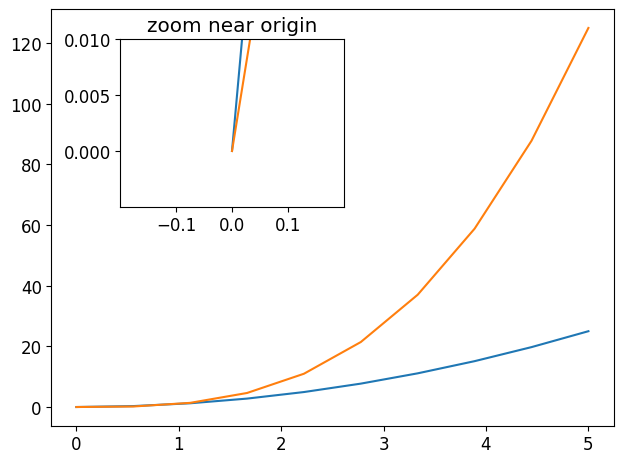

In [55]:
fig, ax = plt.subplots()

ax.plot(x, x**2, x, x**3)
fig.tight_layout()

# вставка
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, ширина, высота

inset_ax.plot(x, x**2, x, x**3)
inset_ax.set_title('zoom near origin')

# установить диапазон осей
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# установить расположение делений осей
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Цветовая карта и контурные фигуры

Карты цветов и контурные фигуры полезны для построения графиков функций двух переменных. В большинстве этих функций мы будем использовать карту цветов для кодирования одного измерения данных. Существует ряд предопределенных цветовых карт. Определить пользовательские карты цветов относительно просто. Список предопределенных цветовых карт см. по адресу: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps.

In [56]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [57]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

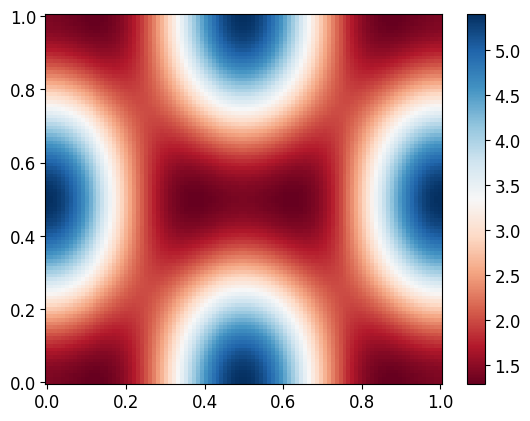

In [58]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

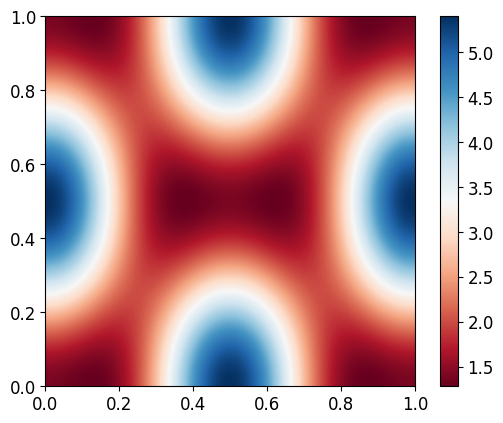

In [59]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

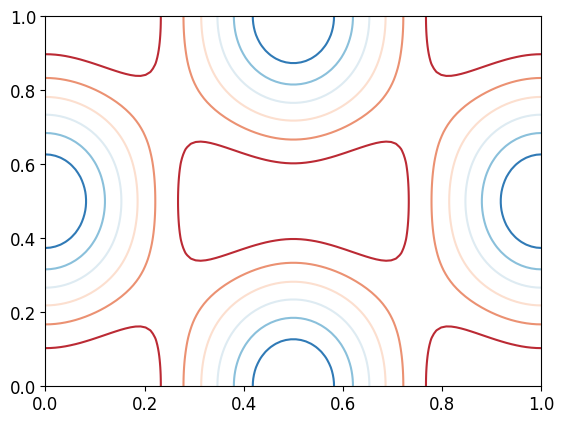

In [60]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D графики

Чтобы использовать 3D-графику в matplotlib, нам сначала нужно создать экземпляр класса Axes3D. 3D-оси можно добавить на холст фигуры matplotlib точно так же, как 2D-оси; или, что более удобно, путем передачи ключевого аргумента project='3d' методам add_axes или add_subplot.

In [61]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

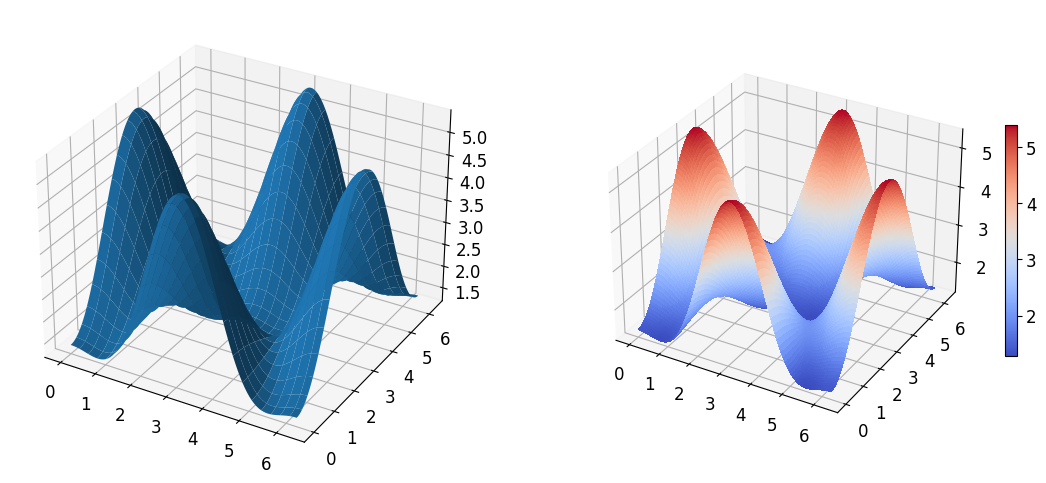

In [62]:
fig = plt.figure(figsize=(14,6))

# `ax` это экземпляр оси с поддержкой 3D из-за аргумента ключевого слова project='3d' для add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# поверхность с цветовой градацией и цветовой полосой
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Каркас

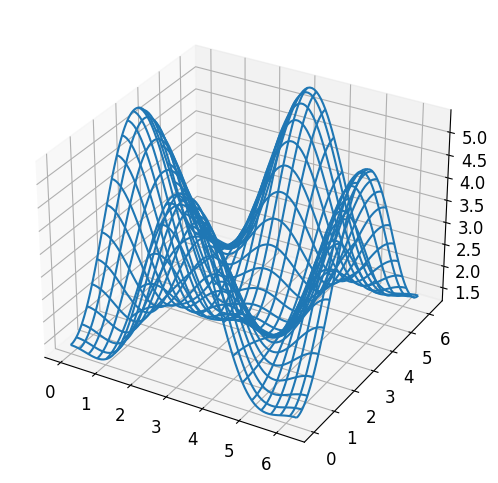

In [63]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Контурные графики с проекциями

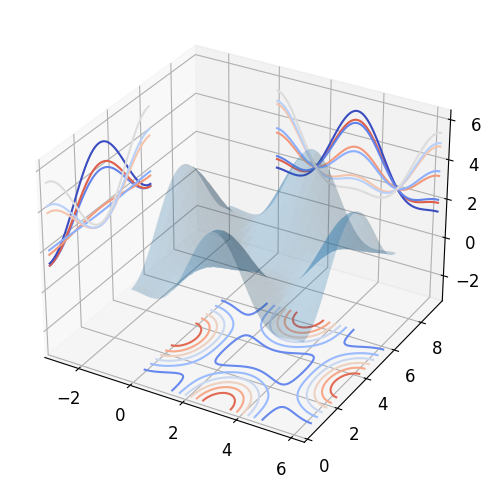

In [64]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Изменение угла обзора

Мы можем изменить перспективу 3D-графика, используя метод view_init, который принимает два аргумента: высоту и угол азимута (в градусах):

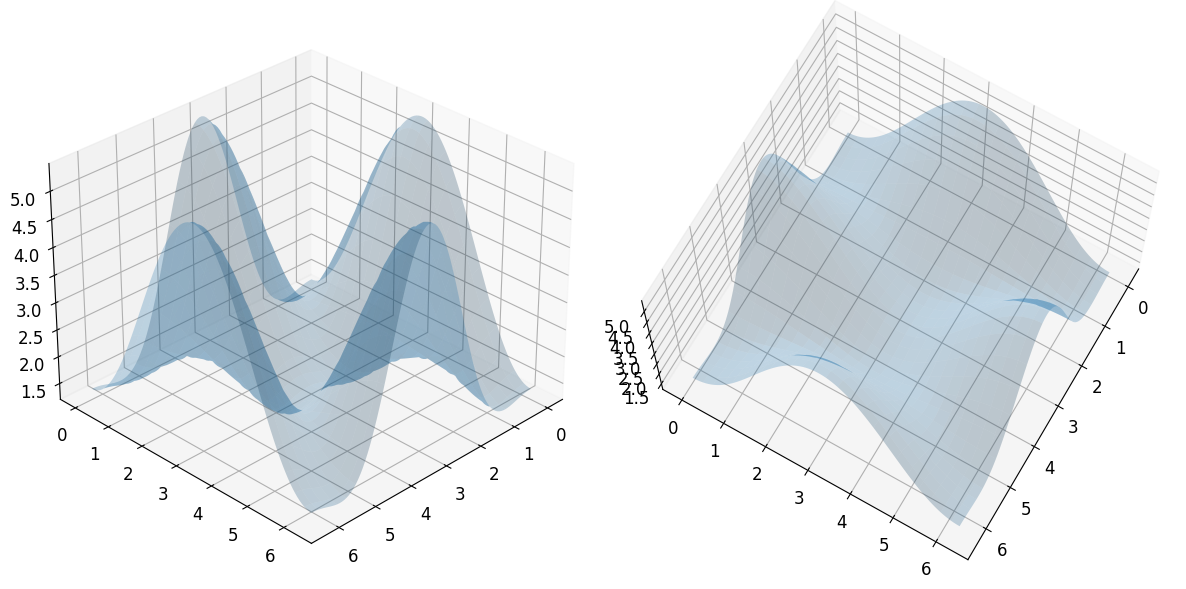

In [65]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

### Анимация

Matplotlib также включает простой интерфейс для создания анимации для последовательностей фигур. С помощью функции FuncAnimation мы можем создать файл фильма из последовательностей фигур. Функция принимает следующие аргументы: fig, холст фигуры, func, предоставляемая нами функция, которая обновляет фигуру, init_func, функция, которую мы предоставляем для настройки фигуры, фрейм, количество генерируемых кадров и blit, который сообщает функция анимации для обновления только тех частей кадра, которые изменились (для более плавной анимации):

    def init():
        # setup figure

    def update(frame_counter):
        # update figure for new frame

    anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

    anim.save('animation.mp4', fps=30) # fps = frames per second

To use the animation features in matplotlib we first need to import the module `matplotlib.animation`:

In [66]:
from matplotlib import animation

In [67]:
# снова решить  обыкновенное дифференциальное уравнение о двойном составном маятнике

from scipy.integrate import odeint
from numpy import cos, sin

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]

    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state
t = np.linspace(0, 10, 250) # временные координаты
x = odeint(dx, x0, t)    # solve the ODE problem

Создайте анимацию, которая показывает положение маятников в зависимости от времени:

In [68]:
from IPython import display

In [69]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])
    return pendulum1, pendulum2,

def update(n):
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])

    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])
    return pendulum1, pendulum2,

anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)
#video = anim.to_html5_video()
#html = display.HTML(video)
#display.display(html)

# anim.save can be called in a few different ways, some which might or might not work
# on different platforms and with different versions of matplotlib and video encoders
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'], writer=animation.FFMpegWriter())
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
anim.save('animation.mp4', fps=120, writer="ffmpeg")
#anim.save('animation.mp4', fps=20, writer="avconv", codec="libx264")
#anim.save('animation.gif', fps=20, writer="imagemagick")

plt.close(fig)

<b>Внимание! Для корректной работы нужен ffmpeg!</b>

In [70]:
from IPython.display import HTML
import base64
video = open("animation.mp4", "rb").read()
video_encoded = base64.b64encode(video)
#print(video_encoded)
video_tag = f'<video controls alt="test" src="data:video/mp4;base64,{video_encoded.decode("utf-8")}">'
HTML(video_tag)

### "Изнанка"

Matplotlib имеет ряд «бэкендов», отвечающих за визуализацию графиков. Различные серверные части могут генерировать графику с различными форматами и циклами отображения/события. Существует различие между неинтерактивными бэкэндами (такими как «agg», «svg», «pdf» и т. д.), которые используются только для создания файлов изображений (например, с функцией savefig), и интерактивными бэкендами (такими как Qt4Agg, GTK). , MaxOSX), который может отображать окно графического интерфейса пользователя для интерактивного просмотра рисунков.

Список доступных бэкэндов:


In [71]:
print(matplotlib.rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


Серверная часть по умолчанию, называемая agg, основана на библиотеке растровой графики, которая отлично подходит для создания растровых форматов, таких как PNG.

Обычно нам не нужно беспокоиться об изменении бэкенда по умолчанию; но иногда бывает полезно переключиться, например, на PDF или GTKCairo (если вы используете Linux) для создания высококачественной векторной графики вместо растровой.

#### Генерация SVG с помощью бэкенда svg

In [72]:
#
# RESTART THE NOTEBOOK: the matplotlib backend can only be selected before pylab is imported!
# (e.g. Kernel > Restart)
#
import matplotlib
matplotlib.use('svg')
import matplotlib.pylab as plt
import numpy
from IPython.display import Image, SVG

In [73]:
#
# Now we are using the svg backend to produce SVG vector graphics
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

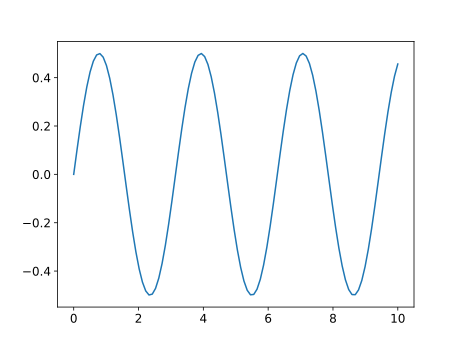

In [74]:
#
# Show the produced SVG file.
#
SVG(filename="test.svg")

#### The IPython notebook inline backend

When we use IPython notebook it is convenient to use a matplotlib backend that outputs the graphics embedded in the notebook file. To activate this backend, somewhere in the beginning on the notebook, we add:

    %matplotlib inline

It is also possible to activate inline matplotlib plotting with:

    %pylab inline

The difference is that `%pylab inline` imports a number of packages into the global address space (scipy, numpy), while `%matplotlib inline` only sets up inline plotting. In new notebooks created for IPython 1.0+, I would recommend using `%matplotlib inline`, since it is tidier and you have more control over which packages are imported and how. Commonly, scipy and numpy are imported separately with:

    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt

The inline backend has a number of configuration options that can be set by using the IPython magic command `%config` to update settings in `InlineBackend`. For example, we can switch to SVG figures or higher resolution figures with either:

    %config InlineBackend.figure_format='svg'
     
or:

    %config InlineBackend.figure_format='retina'
    
For more information, type:

    %config InlineBackend

In [75]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import matplotlib.pylab as plt
import numpy

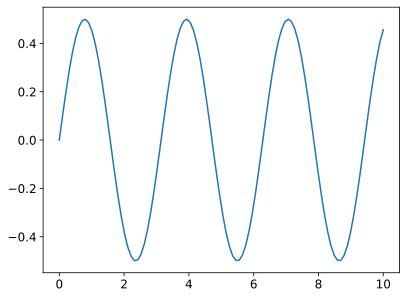

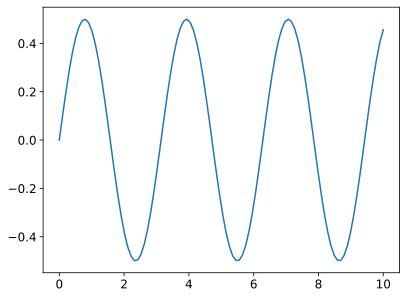

In [76]:
#
# Now we are using the SVG vector graphics displaced inline in the notebook
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

# Настройка параметров визуализации графиков

### Подгрузка датасета

In [77]:
!gdown --id 18yofdxO2BYBmlw8wmVHEwGFiALR2F4lC
import pandas as pd
dataset = pd.read_csv('housing_market_dataset.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=18yofdxO2BYBmlw8wmVHEwGFiALR2F4lC 



FileNotFoundError: ignored

#### Пример плохого графика - слились подписи

In [ ]:
import matplotlib.pyplot as plt

type_counts = dataset['Тип здания'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.show()

### 1. Исправление слившихся подписей

In [ ]:
plt.xticks(rotation=30)

plt.bar(type_counts.index, type_counts.values)
plt.show()

In [ ]:
plt.xticks(rotation=30, ha = 'right')

plt.bar(type_counts.index, type_counts.values)
plt.show()

### 2. Наглядность и читаемость графика

In [ ]:
plt.title('Диаграмма распределения типов здания')

plt.xticks(rotation=30, ha = 'right')

plt.bar(type_counts.index, type_counts.values)
plt.show()

In [ ]:
# Добавим метку
plt.ylabel('Количество квартир')
plt.title('Диаграмма распределения типов здания')

plt.xticks(rotation=30, ha = 'right')

plt.bar(type_counts.index, type_counts.values)
plt.show()

In [ ]:
# Увеличим шрифт названия диаграммы и подписи оси y
plt.ylabel('Количество квартир', fontsize=14)
plt.title('Диаграмма распределения типов здания', fontsize=15)

plt.xticks(rotation=30, ha = 'right', fontsize = 12)

plt.bar(type_counts.index, type_counts.values)
plt.show()

In [ ]:
params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'axes.labelsize': 14    # Размер шрифта подписей осей
          }
plt.rcParams.update(params)

In [ ]:
plt.ylabel('Количество квартир')
plt.title('Диаграмма распределения типов здания')

plt.xticks(rotation=30, ha = 'right')

plt.bar(type_counts.index, type_counts.values)
plt.show()

### 3. Фильтрация данных

In [ ]:
type_counts

Как видим, есть категории, имеющие мало значений. Попробуем их объединить.

In [ ]:
other_types = type_counts[type_counts<500]
type_counts = type_counts[type_counts>500]

In [ ]:
type_counts['Другое'] = other_types.sum()

In [ ]:
plt.ylabel('Количество квартир')
plt.title('Диаграмма распределения типов здания')

plt.xticks(rotation=30, ha = 'right')

plt.bar(type_counts.index, type_counts.values)
plt.show()

### 4. Настройки для красоты графика

![](https://miro.medium.com/max/1400/1*QT5UhLX452dXRmfPc1un3Q.png)
Более подробно стили можно посмотреть [здесь](https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html)

In [ ]:
plt.style.use('seaborn')

In [ ]:
params = {
          'axes.titlesize': 15,
          'xtick.labelsize': 12,
          'axes.labelsize': 14
          }
plt.rcParams.update(params)

In [ ]:
plt.ylabel('Количество квартир')
plt.title('Диаграмма распределения типов здания')

plt.xticks(rotation=30, ha = 'right')

plt.bar(type_counts.index, type_counts.values)
plt.show()

In [ ]:
plt.ylabel('Количество квартир')
plt.title('Диаграмма распределения типов здания')

plt.xticks(rotation=30, ha = 'right')

plt.bar(type_counts.index, type_counts.values, color='#03A9F4')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Шаблон улучшения графика

In [ ]:
import matplotlib.pyplot as plt

type_counts = dataset['Тип здания'].value_counts()

other_types = type_counts[type_counts<500]
type_counts = type_counts[type_counts>500]
type_counts['Другое'] = other_types.sum() # Замена редких значений категорией Другое

plt.style.use('seaborn') # Смена стиля всех графиков matplotlib

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'axes.labelsize': 14    # Размер шрифта подписей осей
          }
plt.rcParams.update(params) # Фиксация параметров

plt.ylabel('Количество квартир') # Подпись оси Y
plt.title('Диаграмма распределения типов здания') # Подпись всего графика

plt.xticks(rotation=30, ha = 'right') # Поворот на 30 градусов подписей оси X и выравнивание по правому краю

plt.bar(type_counts.index, type_counts.values, color='#03A9F4') # Кастомизация цвета
plt.show()

# Задания

Ответьте **практически** на вопросы задания

## 1. Легенда

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# создание данных
x = np.linspace(1, 50, 50)
np.random.seed(1)
y = np.random.randint(0, 20, 50)

# график
plt.plot(x, y)
plt.plot(x*2, y/2)

# добавление легенды
plt.legend(['Legend', 'AnotherLegend'], loc=2, fontsize=20, labelspacing=1, ncol=2)

plt.show()

In [ ]:

fig, axes = plt.subplots(2)

axes[0].plot(x, y, label='Legend')
axes[1].plot(x*2, y/2, label='AnotherLegend')

# добавление легенды
fig.legend(loc=2, fontsize=20, labelspacing=1, ncol=2, edgecolor='red', bbox_to_anchor=(1,1))

plt.show()

1. Измените положение легенды в Matplotlib
2. Как изменить размер шрифта легенды в Matplotlib?
3. Как изменить расстояние по вертикали между записями легенды в Matplotlib?
4. Используйте несколько столбцов в легенде Matplotlib
5. Как создать единую легенду для всех подзаголовков в Matplotlib?
6. Как вручную добавить легенду с цветной рамкой на фигуру Matplotlib?
7. Как разместить легенду за пределами сюжета в Matplotlib?
8. Удалите границу легенды в Matplotlib

Для выполнения создаете кусочек кода, в нем в виде комментария пишите, что вы изменили и должен быть виден результат



## 2. Линейная диаграмма

In [ ]:
plt.axhline(y = 0.5, color = 'r', linestyle = '-') # просто пример

Используя plt.axhline и plt.axvline:
1. Постройте горизонтальную линию в Matplotlib (использовать plt.axhline)
2. Постройте несколько горизонтальных линий разных типов, ширины и цветов на одном графике
3. Постройте вертикальную линию в Matplotlib
4. Постройте несколько вертикальных линий разных типов, ширины и цветов на одном графике
3. Измените непрозрачность строки в Matplotlib
4. Увеличьте толщину линии с помощью Matplotlib
5. Как заполнить между несколькими строками в Matplotlib?



In [ ]:
plt.axhline(y = 0.5, color = 'r', linestyle = '--')

In [ ]:
plt.axhline(y = 0.5, color = 'r', linestyle = '--',  linewidth=5)
plt.axhline(y = 0.8, color = 'b')
plt.axhline(y = 0.2, color = 'y', linestyle = '-.', linewidth=10)

In [ ]:
plt.axvline(x = 0.5, color = 'r', linestyle = '-')

In [ ]:
plt.axvline(x = 0.5, color = 'r', linestyle = '-',  linewidth=5)
plt.axvline(x = 0.8, color = 'b')
plt.axvline(x = 0.2, color = 'y', linestyle = '-', linewidth=10)

In [ ]:
plt.axhline(y = 0.5, color = 'r', linestyle = '-',  linewidth=5, alpha=0.2)

In [ ]:
plt.axhline(y = 0.5, color = 'r', linestyle = '-',  linewidth=10)

In [ ]:
plt.axhline(y = 0.2, color = 'r', linestyle = '-',  linewidth=5)
plt.axhline(y = 0.5, color = 'r', linestyle = '-',  linewidth=5)
plt.fill_between(x=[0,1], y1=0.2, y2=0.5, color='g')
plt.xlim(0,1)
plt.show()

## Гистограмма

1. Нарисуйте горизонтальную гистограмму с помощью Matplotlib
2. Как отобразить значение каждого столбца на гистограмме с помощью Matplotlib?
3. Как аннотировать столбцы в Barplot с помощью Matplotlib на Python?
4. Как аннотировать столбцы в сгруппированном столбчатом графике на Python?
5. Изобразите столбчатую диаграмму колонки «Класс жилья». Расположите в порядке убывания размеры столбцов. В ответ запишите нужную последовательность цифр, например 1234 (начальные данные  из ноута "Создание наглядных графиков")

Данные можно взять из ноута "Создание наглядных графиков"


In [ ]:
data = [1,2,3,4,5]

plt.barh(data, data, label='test')
plt.show()

In [ ]:
data = [3, 7, 1, 5, 9]

plt.barh(range(len(data)), data)

for i, value in enumerate(data):
    plt.text(value, i, str(value), va='center')

# Отображаем график
plt.show()

In [ ]:
categories = ['A', 'B', 'C', 'D']
values = [10, 25, 15, 30]

plt.bar(categories, values)

for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center')

# Отображаем график
plt.show()

In [ ]:
# Пример данных
categories = ['A', 'B', 'C', 'D']
values1 = [10, 25, 15, 30]
values2 = [15, 30, 10, 25]

# Создаем сгруппированный барплот
width = 0.4
x = np.arange(len(categories))
plt.bar(x - width/2, values1, width, label='Группа 1')
plt.bar(x + width/2, values2, width, label='Группа 2')

# Добавляем аннотации для столбцов
for i, (value1, value2) in enumerate(zip(values1, values2)):
    plt.text(x[i] - width/2, value1 + 1, str(value1), ha='center')
    plt.text(x[i] + width/2, value2 + 1, str(value2), ha='center')

plt.xticks(x, categories)
plt.legend()

plt.show()

In [ ]:
import pandas as pd
# Пример данных в DataFrame
data = pd.DataFrame({'Класс жилья': ['A', 'B', 'C', 'D'],
                     'Количество': [10, 25, 15, 30]})

# Сортировка данных по убыванию
data = data.sort_values(by='Количество', ascending=False)

# Создаем столбчатую диаграмму
plt.bar(data['Класс жилья'], data['Количество'])

# Отображаем график
plt.show()

## Точечная диаграмма

1. Как добавить легенду к точечной диаграмме в Matplotlib?
2. Как соединить точки диаграммы рассеяния с линией в Matplotlib?
3. Как создать точечную диаграмму с несколькими цветами в Matplotlib?
4. Как увеличить размер точек разброса в Matplotlib?

In [ ]:
# Пример данных
x1 = [1, 2, 3, 4, 5]
y1 = [2, 4, 1, 3, 5]
x2 = [1, 2, 3, 4, 5]
y2 = [5, 3, 4, 2, 1]

# Создаем точечную диаграмму
plt.scatter(x1, y1, label='Группа 1', color='blue')
plt.scatter(x2, y2, label='Группа 2', color='red')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

In [ ]:
# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем точечную диаграмму
plt.scatter(x, y, label='Точки', color='blue')

# Соединяем точки линией
plt.plot(x, y, label='Линия', color='red')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

In [ ]:
# Пример данных
x1 = [1, 2, 3, 4, 5]
y1 = [2, 4, 1, 3, 5]
x2 = [1, 2, 3, 4, 5]
y2 = [5, 3, 4, 2, 1]

# Создаем точечную диаграмму с разными цветами
plt.scatter(x1, y1, label='Группа 1', color='blue')
plt.scatter(x2, y2, label='Группа 2', color='red')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

In [ ]:
# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем точечную диаграмму с увеличенными точками
plt.scatter(x, y, label='Точки', color='blue', s=100)

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

## Круговая диаграмма


1. Постройте круговую диаграмму в Python, используя Matplotlib
2. Как установить границу для клиньев в круговой диаграмме Matplotlib?
3. Радиально сместите клин круговой диаграммы в Matplotlib

In [ ]:
# Пример данных
labels = ['Категория A', 'Категория B', 'Категория C', 'Категория D']
sizes = [30, 25, 20, 25]

# Создаем круговую диаграмму
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Отображаем график
plt.axis('equal')  # Эта строка делает круг круглым, а не эллипсом
plt.show()

In [ ]:
# Пример данных
labels = ['Категория A', 'Категория B', 'Категория C', 'Категория D']
sizes = [30, 25, 20, 25]
explode = (0.1, 0, 0, 0)  # Смещение первого клина

# Создаем круговую диаграмму с границей для клиньев
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 1, 'edgecolor': 'w'})

# Отображаем график
plt.axis('equal')
plt.show()

In [ ]:
# Пример данных
labels = ['Категория A', 'Категория B', 'Категория C', 'Категория D']
sizes = [30, 25, 20, 25]
explode = (0.1, 0.2, 0.3, 0.4)  # Радиальное смещение для всех клинов

# Создаем круговую диаграмму с радиальным смещением клинов
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)

# Отображаем график
plt.axis('equal')
plt.show()

## Общие настройки графиков

1. Как изменить прозрачность графика в Matplotlib с помощью Python?
2. Как изменить цвет графика в Matplotlib с помощью Python?
3. Как изменить размер шрифта заголовка на рисунке Matplotlib?
4. Как установить размер шрифта для меток в Matplotlib?
5. Как задать цвет фона графика в Matplotlib?
6. Как сгенерировать случайный цвет для графика Matplotlib в Python?
7. Добавьте текст внутри графика в Matplotlib
8. Как добавить текст в Matplotlib?
9. Как изменить размер цветовой панели Matplotlib в Python?
10. Как изменить размер фигур, нарисованных с помощью matplotlib?
11. Как вручную добавить легенду с цветной рамкой на фигуру Matplotlib?
12. Как изменить размер меток осей в Matplotlib?
13. Как скрыть метки текста оси или метки в Matplotlib?
14. Как настроить положение меток осей в Matplotlib?
15. Скрыть ось, границы и пробелы в Matplotlib

In [ ]:
# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график с прозрачностью
plt.plot(x, y, label='График', alpha=0.5)

# Отображаем график
plt.show()

In [ ]:
# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график с измененным цветом
plt.plot(x, y, label='График', color='red')

# Отображаем график
plt.show()

In [ ]:
# Создаем рисунок
fig, ax = plt.subplots()

# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график
ax.plot(x, y, label='График')

# Устанавливаем размер шрифта заголовка
ax.set_title('Заголовок', fontsize=16)

# Отображаем график
plt.show()

In [ ]:
# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график
plt.plot(x, y, label='График')

# Устанавливаем размер шрифта для меток
plt.xlabel('Метка X', fontsize=14)
plt.ylabel('Метка Y', fontsize=14)

# Отображаем график
plt.show()

In [ ]:
# Создаем рисунок
fig, ax = plt.subplots()

# Устанавливаем цвет фона
fig.set_facecolor('lightgray')

# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график
ax.plot(x, y, label='График')

# Отображаем график
plt.show()

In [ ]:
import random

# Генерируем случайный цвет
color = "#{:02x}{:02x}{:02x}".format(random.randrange(256), random.randrange(256), random.randrange(256))

# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график с случайным цветом
plt.plot(x, y, label='График', color=color)

# Отображаем график
plt.show()

In [ ]:
# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график
plt.plot(x, y, label='График')

# Добавляем текст внутри графика
plt.text(2, 3, 'Пример текста', fontsize=12, color='red')

# Отображаем график
plt.show()

In [ ]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график
plt.plot(x, y, label='График')

# Добавляем текст к рисунку
plt.text(3, 5, 'Пример текста', fontsize=12, color='red')

# Отображаем график
plt.show()

In [ ]:

# Пример данных
x = np.linspace(0, 20, 100)
y = np.sin(x)

# Создаем график с цветовой панелью
plt.scatter(x, y, c=y, cmap='viridis', label='График')
cbar = plt.colorbar()

# Изменяем размер цветовой панели
cbar.ax.set_ylabel('Цветовая панель', fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.yaxis.labelpad = 15  # Расстояние между панелью и меткой

# Отображаем график
plt.show()

In [ ]:
# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график с измененным размером точек
plt.scatter(x, y, label='Точки', s=100)  # s устанавливает размер точек в пикселях

# Отображаем график
plt.show()

In [ ]:
import matplotlib.patches as mpatches

# Создаем рисунок
fig, ax = plt.subplots()

# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график
ax.plot(x, y, label='График')

# Создаем объект Rectangle для легенды
legend_rect = mpatches.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)

# Добавляем Rectangle к фигуре
ax.add_artist(legend_rect)

# Создаем легенду
ax.legend([legend_rect], ['Легенда с цветной рамкой'])

# Отображаем график
plt.show()

In [ ]:

# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график
plt.plot(x, y, label='График')

# Изменяем размер меток осей
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)

# Отображаем график
plt.show()

In [ ]:
# Пример данных
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Создаем график
plt.plot(x, y, label='График')

# Скрываем метки на оси x
plt.xticks([])

# Скрываем метки на оси y
plt.yticks([])

# Отображаем график
plt.show()

## Список полезной литературы

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended!
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.


*Данные материалы использовались для преподавания программы ДПО "ИИ и машинное обучение"